In [ ]:
!pip install tushare
!pip install tqdm
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import glob
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 2.6 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
def ts_sum(df, window=10):
    return df.rolling(window).sum()

def sma(df, window=10):
    return df.rolling(window).mean()

def ts_min(df, window=10):
    return df.rolling(window).min()

def ts_median(df, window=10):
    return df.rolling(window).median()

def ts_max(df, window=10):
    return df.rolling(window).max()

def delta(df, period=1):
    return df.diff(period)

def delay(df, period=1):
    return df.shift(period)

def rank(df):
    return df.rank(axis=1, pct=True)

def ts_argmax(df, window=10):
    return df.rolling(window).apply(np.argmax) + 1


In [ ]:

class AlphaLib(object):
    def __init__(self, daily_info):
        self.open = daily_info['open']
        self.high = daily_info['high']
        self.low = daily_info['low']
        self.close = daily_info['close']
        self.vwap = daily_info['vwap']
        self.volume = daily_info['volume']
        self.amount = daily_info['amount']

    def calcu_alpha(self):
        alpha_dict={}
#         alpha_dict['alpha01']=((self.close/sma(self.close,10)-1)*self.amount).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha02']=sma(self.amount,5).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha06']=sma((self.close/sma(self.close, 5)-1)*self.amount,5).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha07']=ts_max((self.close/sma(self.close, 15)-1)*self.amount,15).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha08']=ts_min((self.close/ts_max(self.close, 60)-1)*self.amount,10).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha09']=ts_max((self.close/ts_min(self.close, 60)-1)*self.amount,50).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha10']=ts_max((self.close/ts_min(self.close, 20)-1)*self.amount,15).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha12']=ts_max((ts_max(self.high,30)/ts_min(self.low, 30)-1)*self.amount,20).div(self.amount.sum(1),axis=0)
#         alpha_dict['alpha13']=ts_max(self.high-self.low, 30)/ts_min(self.close+self.open, 30)
#         alpha_dict['alpha14']=ts_sum(self.amount*(self.close-self.open), 5)
#         alpha_dict['alpha15']=ts_max(self.amount*(self.high-self.low), 15)
#         alpha_dict['alpha16']=ts_sum(self.amount*(self.close-self.vwap), 5)
#         alpha_dict['alpha17']=ts_min(self.amount*(self.low-self.vwap), 15)
#         alpha_dict['alpha18']=ts_min(self.amount*(self.open-self.vwap), 15)
#         alpha_dict['alpha19']=ts_min(self.amount*(self.open-self.low), 10)
#         alpha_dict['alpha20']=ts_max(self.amount*(self.close-self.low), 10)
#         alpha_dict['alpha21']=ts_median(self.amount,15)/ts_sum(self.amount,15)
#         alpha_dict['alpha23']=ts_max(self.amount,15)/ts_min(self.amount,10)
#         alpha_dict['alpha24']=ts_sum(self.amount.div(self.amount.sum(1),axis=0),5)
#         alpha_dict['alpha28']=(ts_max(self.close,5)/delay(self.close,5))*ts_min(self.close,5)/self.close

#         tmp2=abs((self.close-self.open)/(self.high-self.low+0.01))
#         alpha_dict['alpha29']=ts_max(tmp2,6)/ts_min(tmp2,6)
#         alpha_dict['alpha30']=tmp2/delay(tmp2,4)

#         tmp3=abs((self.low-self.open)/(self.close-self.low+0.01))
#         alpha_dict['alpha31']=ts_max(tmp3,4)/ts_min(tmp3,4)

#         tmp4=abs((self.high-self.open)/(self.close-self.low+0.01))
#         alpha_dict['alpha32']=ts_max(tmp4,2)/ts_min(tmp4,2)

#         alpha_dict['alpha_w_005'] = (rank((self.open - (ts_sum(self.vwap, 10) / 10))) * (-1 * abs(rank((self.close - self.vwap)))))
#         alpha_dict['alpha_pe']= -1*daily_info['pe_ttm']
#         alpha_dict['alpha_total_mv']= daily_info['total_mv']
#         alpha_dict['alpha_pb']= -1*daily_info['pb']
#         alpha_dict['alpha_turnover_rate']= daily_info['turnover_rate']
#         alpha_dict['alpha_volume_ratio']= daily_info['volume_ratio']
#         alpha_dict['alpha_vwap']= daily_info['vwap']
#         alpha_dict['alpha_dv_ttm']= -1*daily_info['dv_ttm']

        alpha_dict['open'] = daily_info['open']
        alpha_dict['high'] = daily_info['high']
        alpha_dict['low'] = daily_info['low']
        alpha_dict['close'] = daily_info['close']
#         alpha_dict['vwap'] = daily_info['vwap']
        alpha_dict['volume'] = daily_info['volume']
#         alpha_dict['amount'] = daily_info['amount']

        return alpha_dict


In [ ]:
sp_price = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/sp300_price.csv')
sp_price.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Amount
0,2024-05-28,A,147.115265,148.210007,151.190002,147.699997,150.820007,1366900,2.010919e+08
1,2024-05-29,A,144.405426,145.479996,146.990005,144.750000,146.740005,1603200,2.315108e+08
2,2024-05-30,A,130.449280,131.419998,135.179993,125.300003,125.300003,5138500,6.703136e+08
3,2024-05-31,A,129.446762,130.410004,134.070007,129.559998,131.000000,5333100,6.903525e+08
4,2024-06-03,A,130.429428,131.399994,132.580002,130.000000,130.000000,3114800,4.062616e+08


In [ ]:
sp_basic = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/sp300_basic.csv')
sp_basic.rename(columns={'ticker':'Ticker'}, inplace=True)
sp_basic.rename(columns={'trade_date':'Date'}, inplace=True)

In [ ]:
price_PD_total = pd.merge(sp_price, sp_basic,how='left', on=['Ticker','Date'])
price_PD_total.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Amount,turnover_rate,...,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
0,2024-05-28,A,147.115265,148.210007,151.190002,147.699997,150.820007,1366900,2.010919e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-29,A,144.405426,145.479996,146.990005,144.750000,146.740005,1603200,2.315108e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-05-30,A,130.449280,131.419998,135.179993,125.300003,125.300003,5138500,6.703136e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-05-31,A,129.446762,130.410004,134.070007,129.559998,131.000000,5333100,6.903525e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-03,A,130.429428,131.399994,132.580002,130.000000,130.000000,3114800,4.062616e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(price_PD_total.columns)

24

In [ ]:
# at the beginning of the market, the opening increases
price_PD_total['open_up'] = price_PD_total.groupby('Ticker').Open.shift(1)/price_PD_total.groupby('Ticker').Close.shift(0)
price_PD_total.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Amount,turnover_rate,...,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,ret1,ret2,ret,open_up
0,2024-05-28,A,147.115265,148.210007,151.190002,147.699997,150.820007,1366900,2.010919e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.981580,0.895598,0.895598,NaN
1,2024-05-29,A,144.405426,145.479996,146.990005,144.750000,146.740005,1603200,2.315108e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.903354,1.040782,1.040782,1.036706
2,2024-05-30,A,130.449280,131.419998,135.179993,125.300003,125.300003,5138500,6.703136e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.992315,1.003053,1.003053,1.116573
3,2024-05-31,A,129.446762,130.410004,134.070007,129.559998,131.000000,5333100,6.903525e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.007591,1.006539,1.006539,0.960816
4,2024-06-03,A,130.429428,131.399994,132.580002,130.000000,130.000000,3114800,4.062616e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.995814,1.017677,1.017677,0.996956


In [ ]:
#t close buy, t+1 close sell
price_PD_total['ret1'] = price_PD_total.groupby('Ticker').Close.shift(-1)/price_PD_total.groupby('Ticker').Close.shift(0)

#t+1 open buy, t+2 close sell
price_PD_total['ret2'] = price_PD_total.groupby('Ticker').Close.shift(-2)/price_PD_total.groupby('Ticker').Open.shift(-1)

# price_PD_total['ret'] = price_PD_total['ret1'] + price_PD_total['ret2']
price_PD_total['ret'] = price_PD_total['ret2'].copy()
price_PD_total.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Amount,turnover_rate,...,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,ret1,ret2,ret,open_up
0,2024-05-28,A,147.115265,148.210007,151.190002,147.699997,150.820007,1366900,2.010919e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.981580,0.895598,0.895598,NaN
1,2024-05-29,A,144.405426,145.479996,146.990005,144.750000,146.740005,1603200,2.315108e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.903354,1.040782,1.040782,1.036706
2,2024-05-30,A,130.449280,131.419998,135.179993,125.300003,125.300003,5138500,6.703136e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.992315,1.003053,1.003053,1.116573
3,2024-05-31,A,129.446762,130.410004,134.070007,129.559998,131.000000,5333100,6.903525e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.007591,1.006539,1.006539,0.960816
4,2024-06-03,A,130.429428,131.399994,132.580002,130.000000,130.000000,3114800,4.062616e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.995814,1.017677,1.017677,0.996956


In [ ]:
daily_info = {}
daily_info['open'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='Open')
daily_info['high'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='High')
daily_info['low'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='Low')
daily_info['close'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='Close')
daily_info['volume'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='Volume')
daily_info['amount'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='Amount')
daily_info['vwap'] = (daily_info['volume']*1000)/(daily_info['amount']*100+1)
daily_info['pe_ttm'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='pe_ttm')
daily_info['total_mv'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='total_mv')
daily_info['pb'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='pb')
daily_info['turnover_rate'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='turnover_rate')
daily_info['volume_ratio'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='volume_ratio')
daily_info['dv_ttm'] = pd.pivot(price_PD_total, index='Date', columns='Ticker', values='dv_ttm')



In [ ]:
tmp_class = AlphaLib(daily_info)
alpha_dict = tmp_class.calcu_alpha()

In [ ]:
alpha_dict.keys()

dict_keys(['open', 'high', 'low', 'close', 'volume'])

In [ ]:
data = pd.DataFrame()
for k, v in tqdm(alpha_dict.items()):
    tmp = v.unstack().reset_index().rename(columns={0:k})
    if len(data) == 0:
        data = tmp
    else:
        data = pd.merge(data, tmp, how='left', on=['Ticker', 'Date'])

100%|██████████| 5/5 [00:00<00:00,  9.41it/s]


In [ ]:
v = alpha_dict['open']
v

Ticker,A,ABBV,ABNB,ABT,ACGL,ADM,AFL,AIG,AIZ,AJG,...,WRB,WSM,WST,WTW,WYNN,XOM,XYL,YUM,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-28,150.820007,156.350006,146.000000,103.570000,102.629997,60.490002,87.500000,77.930000,168.860001,250.529999,...,52.673332,144.175003,331.920013,252.710007,94.389999,113.519997,144.220001,137.509995,116.510002,170.039993
2024-05-29,146.740005,154.889999,144.880005,101.089996,102.349998,60.490002,86.980003,77.110001,168.270004,247.800003,...,52.213333,138.875000,324.859985,250.740005,92.339996,114.529999,138.699997,135.440002,115.199997,169.479996
2024-05-30,125.300003,154.649994,145.399994,101.279999,101.320000,59.840000,87.160004,77.480003,169.289993,244.960007,...,51.866669,141.130005,320.989990,248.570007,92.519997,113.269997,138.050003,135.059998,115.459999,170.679993
2024-05-31,131.000000,156.649994,145.779999,101.860001,101.440002,60.270000,88.000000,78.510002,171.000000,251.889999,...,53.106667,144.175003,328.959991,251.850006,93.230003,114.120003,139.710007,135.160004,114.370003,170.000000
2024-06-03,130.000000,160.000000,145.740005,102.169998,102.500000,62.049999,89.709999,78.769997,173.039993,252.770004,...,53.946667,147.179993,331.040009,253.619995,95.500000,116.300003,141.199997,137.139999,114.500000,170.039993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-20,113.449997,184.860001,133.755005,135.000000,94.629997,50.000000,106.349998,83.959999,203.119995,342.970001,...,73.540001,173.869995,217.220001,312.200012,96.339996,106.389999,127.599998,149.000000,95.500000,163.339996
2025-05-21,112.000000,183.929993,130.679993,135.100006,93.650002,49.680000,104.760002,83.849998,199.410004,340.040009,...,73.290001,170.289993,214.669998,313.350006,92.889999,104.529999,126.000000,147.910004,94.680000,162.820007
2025-05-22,108.360001,181.410004,126.790001,132.460007,92.779999,47.840000,103.500000,82.750000,192.789993,337.369995,...,72.779999,156.500000,207.350006,311.019989,91.120003,103.059998,125.239998,146.220001,92.160004,160.259995


In [ ]:
tmp = v.unstack().reset_index().rename(columns={0:'open'})

In [ ]:
tmp.head(5)

,Ticker,Date,open
0,A,2024-05-28,150.820007
1,A,2024-05-29,146.740005
2,A,2024-05-30,125.300003
3,A,2024-05-31,131.000000
4,A,2024-06-03,130.000000


In [ ]:
data = pd.merge(data, price_PD_total[['Date','Ticker','ret1','ret2','ret','open_up']], how='left', on=['Ticker','Date'])

In [ ]:
# price_PD_total.columns

In [ ]:
len(data)

75000

In [ ]:
data.columns

Index(['Ticker', 'Date', 'open', 'high', 'low', 'close', 'volume', 'ret1',
       'ret2', 'ret', 'open_up'],
      dtype='object')

In [ ]:
data = data[~data.close.isna()].reset_index(drop=True)
len(data)

75000

In [ ]:
train = data.copy()
# train = train[train.trade_date < '20240101']#.dropna()

train['ret_rank'] = train.groupby('Date').ret.rank(pct=True)
train = train[~train.ret_rank.isna()].reset_index(drop=True)

# from sklearn.model_selection import KFold,GroupKFold,train_test_split

# kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# enumsplit = []
# for fold, (trn_ind, val_ind) in enumerate(kfold.split(train)):
#     enumsplit.append([trn_ind, val_ind])
# enumsplit

In [ ]:
len(train)

74400

In [ ]:
# features = ['alpha01', 'alpha02', 'alpha06', 'alpha07',
#        'alpha08', 'alpha09', 'alpha10', 'alpha12', 'alpha13', 'alpha14',
#        'alpha15', 'alpha16', 'alpha17', 'alpha18', 'alpha19', 'alpha20',
#        'alpha21', 'alpha23', 'alpha24', 'alpha28', 'alpha29', 'alpha30',
#        'alpha31', 'alpha32', 'alpha_w_005', 'alpha_pe', 'alpha_total_mv',
#        'alpha_pb', 'alpha_turnover_rate', 'alpha_volume_ratio', 'alpha_vwap',
#        'alpha_dv_ttm']

features = ['open', 'high', 'low', 'close', 'volume']


In [ ]:
train.replace([np.inf, -np.inf], np.nan,inplace=True)
train[features] = train[features].fillna(train[features].mean())


In [ ]:
y = train['ret_rank']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


df = train.copy()
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
df = reduce_mem_usage(df, verbose=True)

Memory usage after optimization is: 2.55 MB
Decreased by 62.5%


In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Ticker,Date,open,high,low,close,volume,ret1,ret2,ret,open_up,ret_rank
0,A,2024-05-28,-0.150391,-0.152710,-0.152588,-0.154907,-0.372314,0.981445,0.895508,0.895508,NaN,0.006668
1,A,2024-05-29,-0.157349,-0.159790,-0.157593,-0.159424,-0.350342,0.903320,1.041016,1.041016,1.037109,0.910156
2,A,2024-05-30,-0.193481,-0.179443,-0.190796,-0.183105,-0.023590,0.992188,1.002930,1.002930,1.116211,0.379883
3,A,2024-05-31,-0.183838,-0.181274,-0.183594,-0.184814,-0.005596,1.007812,1.006836,1.006836,0.960938,0.696777
4,A,2024-06-03,-0.185547,-0.183716,-0.182739,-0.183228,-0.210693,0.995605,1.017578,1.017578,0.997070,0.796875


In [ ]:
# 2. 数据转换为时间序列格式
def create_time_series(df, n_steps):
    X, y, Xmeta = [], [], []
    for tmp in tqdm(df.groupby('Ticker')):
        ts_code = tmp[0]
        stock_df = tmp[1]
        print(f"ts_code : {ts_code}")
        print(f"stock_df : {len(stock_df)}")
#         stock_df = df[df['ts_code'] == stock_id]
        for i in range(n_steps-1, len(stock_df)-1):
            X.append(stock_df[feature_columns].iloc[i-n_steps+1:i+1].values)
            y.append(stock_df['ret_rank'].iloc[i])
            Xmeta.append(([ts_code,stock_df['Date'].iloc[i]]))
#         break
    return np.array(X), np.array(y), np.array(Xmeta)
feature_columns = features
n_steps = 10  # use last 10 time points data
X, y, Xmeta = create_time_series(df, n_steps)

  0%|          | 1/300 [00:00<00:34,  8.63it/s]

ts_code : A
stock_df : 248
ts_code : ABBV
stock_df : 248


  1%|          | 3/300 [00:00<00:35,  8.44it/s]

ts_code : ABNB
stock_df : 248
ts_code : ABT
stock_df : 248


  2%|▏         | 5/300 [00:00<00:34,  8.57it/s]

ts_code : ACGL
stock_df : 248
ts_code : ADM
stock_df : 248
ts_code : AFL
stock_df : 248


  3%|▎         | 9/300 [00:01<00:31,  9.24it/s]

ts_code : AIG
stock_df : 248
ts_code : AIZ
stock_df : 248
ts_code : AJG
stock_df : 248


  4%|▎         | 11/300 [00:01<00:31,  9.04it/s]

ts_code : ALGN
stock_df : 248
ts_code : ALL
stock_df : 248
ts_code : AMGN
stock_df : 248


  5%|▌         | 15/300 [00:01<00:29,  9.65it/s]

ts_code : AMP
stock_df : 248
ts_code : AMZN
stock_df : 248
ts_code : AON
stock_df : 248


  6%|▌         | 17/300 [00:01<00:29,  9.72it/s]

ts_code : APA
stock_df : 248
ts_code : APO
stock_df : 248


  7%|▋         | 20/300 [00:02<00:29,  9.63it/s]

ts_code : APTV
stock_df : 248
ts_code : AXP
stock_df : 248
ts_code : AZO
stock_df : 248


  7%|▋         | 22/300 [00:02<00:29,  9.58it/s]

ts_code : BAC
stock_df : 248
ts_code : BAX
stock_df : 248


  8%|▊         | 24/300 [00:02<00:29,  9.43it/s]

ts_code : BBY
stock_df : 248
ts_code : BDX
stock_df : 248
ts_code : BEN
stock_df : 248


  9%|▉         | 28/300 [00:02<00:28,  9.70it/s]

ts_code : BF-B
stock_df : 248
ts_code : BG
stock_df : 248
ts_code : BIIB
stock_df : 248


 10%|█         | 31/300 [00:03<00:30,  8.95it/s]

ts_code : BK
stock_df : 248
ts_code : BKNG
stock_df : 248


 11%|█         | 33/300 [00:03<00:29,  9.18it/s]

ts_code : BKR
stock_df : 248
ts_code : BLK
stock_df : 248


 12%|█▏        | 35/300 [00:03<00:28,  9.46it/s]

ts_code : BMY
stock_df : 248
ts_code : BRK-B
stock_df : 248
ts_code : BRO
stock_df : 248


 13%|█▎        | 38/300 [00:04<00:28,  9.12it/s]

ts_code : BSX
stock_df : 248
ts_code : BX
stock_df : 248
ts_code : C
stock_df : 248


 14%|█▎        | 41/300 [00:04<00:28,  9.13it/s]

ts_code : CAG
stock_df : 248
ts_code : CAH
stock_df : 248
ts_code : CB
stock_df : 248


 14%|█▍        | 43/300 [00:04<00:27,  9.18it/s]

ts_code : CBOE
stock_df : 248
ts_code : CCL
stock_df : 248


 15%|█▌        | 45/300 [00:04<00:26,  9.52it/s]

ts_code : CFG
stock_df : 248
ts_code : CHD
stock_df : 248


 16%|█▌        | 48/300 [00:05<00:26,  9.41it/s]

ts_code : CHTR
stock_df : 248
ts_code : CI
stock_df : 248
ts_code : CINF
stock_df : 248


 17%|█▋        | 51/300 [00:05<00:26,  9.54it/s]

ts_code : CL
stock_df : 248
ts_code : CLX
stock_df : 248
ts_code : CMCSA
stock_df : 248


 18%|█▊        | 54/300 [00:05<00:25,  9.61it/s]

ts_code : CME
stock_df : 248
ts_code : CMG
stock_df : 248


 19%|█▊        | 56/300 [00:05<00:25,  9.66it/s]

ts_code : CNC
stock_df : 248
ts_code : COF
stock_df : 248
ts_code : COIN
stock_df : 248


 19%|█▉        | 58/300 [00:06<00:26,  9.24it/s]

ts_code : COO
stock_df : 248
ts_code : COP
stock_df : 248


 20%|██        | 60/300 [00:06<00:25,  9.35it/s]

ts_code : COR
stock_df : 248
ts_code : COST
stock_df : 248


 21%|██        | 63/300 [00:06<00:24,  9.67it/s]

ts_code : CPAY
stock_df : 248
ts_code : CPB
stock_df : 248
ts_code : CRL
stock_df : 248


 22%|██▏       | 66/300 [00:07<00:24,  9.64it/s]

ts_code : CTRA
stock_df : 248
ts_code : CVS
stock_df : 248
ts_code : CVX
stock_df : 248


 23%|██▎       | 68/300 [00:07<00:24,  9.45it/s]

ts_code : CZR
stock_df : 248
ts_code : DASH
stock_df : 248


 24%|██▎       | 71/300 [00:07<00:23,  9.55it/s]

ts_code : DECK
stock_df : 248
ts_code : DG
stock_df : 248
ts_code : DGX
stock_df : 248


 24%|██▍       | 73/300 [00:07<00:24,  9.34it/s]

ts_code : DHI
stock_df : 248
ts_code : DHR
stock_df : 248


 25%|██▌       | 75/300 [00:08<00:24,  9.23it/s]

ts_code : DIS
stock_df : 248
ts_code : DLTR
stock_df : 248


 26%|██▌       | 78/300 [00:08<00:25,  8.70it/s]

ts_code : DPZ
stock_df : 248
ts_code : DRI
stock_df : 248
ts_code : DVA
stock_df : 248


 27%|██▋       | 80/300 [00:08<00:24,  9.13it/s]

ts_code : DVN
stock_df : 248
ts_code : DXCM
stock_df : 248
ts_code : EA
stock_df : 248


 28%|██▊       | 84/300 [00:08<00:22,  9.46it/s]

ts_code : EBAY
stock_df : 248
ts_code : EG
stock_df : 248


 29%|██▊       | 86/300 [00:09<00:23,  9.20it/s]

ts_code : EL
stock_df : 248
ts_code : ELV
stock_df : 248
ts_code : EOG
stock_df : 248


 29%|██▉       | 88/300 [00:09<00:23,  9.19it/s]

ts_code : EQT
stock_df : 248
ts_code : ERIE
stock_df : 248


 30%|███       | 91/300 [00:09<00:22,  9.49it/s]

ts_code : EW
stock_df : 248
ts_code : EXE
stock_df : 248
ts_code : EXPE
stock_df : 248


 31%|███▏      | 94/300 [00:10<00:21,  9.50it/s]

ts_code : F
stock_df : 248
ts_code : FANG
stock_df : 248


 32%|███▏      | 95/300 [00:10<00:21,  9.44it/s]

ts_code : FDS
stock_df : 248
ts_code : FI
stock_df : 248


 32%|███▏      | 97/300 [00:10<00:23,  8.75it/s]

ts_code : FIS
stock_df : 248
ts_code : FITB
stock_df : 248


 33%|███▎      | 99/300 [00:10<00:22,  8.91it/s]

ts_code : FOX
stock_df : 248
ts_code : FOXA
stock_df : 248


 34%|███▍      | 102/300 [00:10<00:21,  9.24it/s]

ts_code : GEHC
stock_df : 248
ts_code : GILD
stock_df : 248


 35%|███▍      | 104/300 [00:11<00:21,  9.13it/s]

ts_code : GIS
stock_df : 248
ts_code : GL
stock_df : 248


 35%|███▌      | 106/300 [00:11<00:21,  9.07it/s]

ts_code : GM
stock_df : 248
ts_code : GOOG
stock_df : 248
ts_code : GOOGL
stock_df : 248


 36%|███▋      | 109/300 [00:11<00:21,  8.87it/s]

ts_code : GPC
stock_df : 248
ts_code : GPN
stock_df : 248
ts_code : GRMN
stock_df : 248


 37%|███▋      | 112/300 [00:12<00:20,  9.23it/s]

ts_code : GS
stock_df : 248
ts_code : GWW
stock_df : 248
ts_code : HAL
stock_df : 248


 38%|███▊      | 114/300 [00:12<00:21,  8.51it/s]

ts_code : HAS
stock_df : 248
ts_code : HBAN
stock_df : 248


 39%|███▉      | 117/300 [00:12<00:20,  8.73it/s]

ts_code : HCA
stock_df : 248
ts_code : HD
stock_df : 248
ts_code : HES
stock_df : 248


 40%|███▉      | 119/300 [00:12<00:19,  9.07it/s]

ts_code : HIG
stock_df : 248
ts_code : HLT
stock_df : 248


 40%|████      | 121/300 [00:13<00:19,  8.96it/s]

ts_code : HOLX
stock_df : 248
ts_code : HRL
stock_df : 248


 41%|████      | 123/300 [00:13<00:19,  9.01it/s]

ts_code : HSIC
stock_df : 248
ts_code : HSY
stock_df : 248


 42%|████▏     | 125/300 [00:13<00:19,  8.89it/s]

ts_code : HUM
stock_df : 248
ts_code : ICE
stock_df : 248


 43%|████▎     | 128/300 [00:13<00:18,  9.30it/s]

ts_code : IDXX
stock_df : 248
ts_code : INCY
stock_df : 248
ts_code : IPG
stock_df : 248


 44%|████▎     | 131/300 [00:14<00:18,  9.33it/s]

ts_code : IQV
stock_df : 248
ts_code : ISRG
stock_df : 248


 44%|████▍     | 132/300 [00:14<00:18,  9.27it/s]

ts_code : IVZ
stock_df : 248
ts_code : JKHY
stock_df : 248


 45%|████▌     | 135/300 [00:14<00:18,  8.86it/s]

ts_code : JNJ
stock_df : 248
ts_code : JPM
stock_df : 248
ts_code : K
stock_df : 248


 46%|████▌     | 137/300 [00:14<00:18,  8.81it/s]

ts_code : KDP
stock_df : 248
ts_code : KEY
stock_df : 248


 46%|████▋     | 139/300 [00:15<00:17,  9.09it/s]

ts_code : KHC
stock_df : 248
ts_code : KKR
stock_df : 248


 47%|████▋     | 141/300 [00:15<00:16,  9.42it/s]

ts_code : KMB
stock_df : 248
ts_code : KMI
stock_df : 248


 48%|████▊     | 143/300 [00:15<00:16,  9.33it/s]

ts_code : KMX
stock_df : 248
ts_code : KO
stock_df : 248


 49%|████▊     | 146/300 [00:15<00:15,  9.66it/s]

ts_code : KR
stock_df : 248
ts_code : KVUE
stock_df : 248
ts_code : L
stock_df : 248


 49%|████▉     | 148/300 [00:16<00:15,  9.65it/s]

ts_code : LEN
stock_df : 248
ts_code : LH
stock_df : 248


 50%|█████     | 151/300 [00:16<00:16,  9.20it/s]

ts_code : LKQ
stock_df : 248
ts_code : LLY
stock_df : 248
ts_code : LOW
stock_df : 248


 51%|█████▏    | 154/300 [00:16<00:15,  9.56it/s]

ts_code : LULU
stock_df : 248
ts_code : LUV
stock_df : 248
ts_code : LVS
stock_df : 248


 52%|█████▏    | 157/300 [00:16<00:15,  9.38it/s]

ts_code : LW
stock_df : 248
ts_code : LYV
stock_df : 248


 53%|█████▎    | 159/300 [00:17<00:15,  9.28it/s]

ts_code : MA
stock_df : 248
ts_code : MAR
stock_df : 248
ts_code : MAS
stock_df : 248


 54%|█████▍    | 162/300 [00:17<00:14,  9.56it/s]

ts_code : MCD
stock_df : 248
ts_code : MCK
stock_df : 248
ts_code : MCO
stock_df : 248


 55%|█████▌    | 165/300 [00:17<00:13,  9.75it/s]

ts_code : MDLZ
stock_df : 248
ts_code : MDT
stock_df : 248
ts_code : MET
stock_df : 248


 55%|█████▌    | 166/300 [00:17<00:13,  9.75it/s]

ts_code : META
stock_df : 248


 56%|█████▌    | 168/300 [00:18<00:19,  6.68it/s]

ts_code : MGM
stock_df : 248
ts_code : MHK
stock_df : 248


 57%|█████▋    | 171/300 [00:18<00:15,  8.32it/s]

ts_code : MKC
stock_df : 248
ts_code : MKTX
stock_df : 248
ts_code : MMC
stock_df : 248


 58%|█████▊    | 174/300 [00:18<00:13,  9.08it/s]

ts_code : MNST
stock_df : 248
ts_code : MO
stock_df : 248


 59%|█████▊    | 176/300 [00:19<00:13,  9.25it/s]

ts_code : MOH
stock_df : 248
ts_code : MPC
stock_df : 248


 59%|█████▉    | 178/300 [00:19<00:13,  9.08it/s]

ts_code : MRK
stock_df : 248
ts_code : MRNA
stock_df : 248
ts_code : MS
stock_df : 248


 60%|██████    | 180/300 [00:19<00:13,  9.15it/s]

ts_code : MSCI
stock_df : 248
ts_code : MTB
stock_df : 248


 61%|██████    | 182/300 [00:19<00:12,  9.44it/s]

ts_code : MTCH
stock_df : 248
ts_code : MTD
stock_df : 248


 62%|██████▏   | 185/300 [00:20<00:11,  9.59it/s]

ts_code : NCLH
stock_df : 248
ts_code : NDAQ
stock_df : 248
ts_code : NDSN
stock_df : 248


 62%|██████▏   | 187/300 [00:20<00:12,  8.74it/s]

ts_code : NFLX
stock_df : 248
ts_code : NKE
stock_df : 248


 63%|██████▎   | 190/300 [00:20<00:11,  9.36it/s]

ts_code : NOC
stock_df : 248
ts_code : NSC
stock_df : 248
ts_code : NTRS
stock_df : 248


 64%|██████▍   | 193/300 [00:21<00:11,  9.73it/s]

ts_code : NVR
stock_df : 248
ts_code : NWS
stock_df : 248
ts_code : NWSA
stock_df : 248


 65%|██████▌   | 195/300 [00:21<00:11,  9.15it/s]

ts_code : ODFL
stock_df : 248
ts_code : OKE
stock_df : 248


 66%|██████▌   | 198/300 [00:21<00:11,  9.18it/s]

ts_code : OMC
stock_df : 248
ts_code : ORLY
stock_df : 248
ts_code : OTIS
stock_df : 248


 67%|██████▋   | 201/300 [00:21<00:10,  9.53it/s]

ts_code : OXY
stock_df : 248
ts_code : PARA
stock_df : 248
ts_code : PAYC
stock_df : 248


 68%|██████▊   | 204/300 [00:22<00:10,  9.58it/s]

ts_code : PAYX
stock_df : 248
ts_code : PCAR
stock_df : 248
ts_code : PEP
stock_df : 248


 69%|██████▉   | 207/300 [00:22<00:09,  9.33it/s]

ts_code : PFE
stock_df : 248
ts_code : PFG
stock_df : 248
ts_code : PG
stock_df : 248


 70%|██████▉   | 209/300 [00:22<00:09,  9.22it/s]

ts_code : PGR
stock_df : 248
ts_code : PH
stock_df : 248


 70%|███████   | 211/300 [00:22<00:09,  9.31it/s]

ts_code : PHM
stock_df : 248
ts_code : PM
stock_df : 248


 71%|███████   | 213/300 [00:23<00:09,  9.06it/s]

ts_code : PNC
stock_df : 248
ts_code : PNR
stock_df : 248


 72%|███████▏  | 216/300 [00:23<00:09,  8.70it/s]

ts_code : PODD
stock_df : 248
ts_code : POOL
stock_df : 248
ts_code : PRU
stock_df : 248


 73%|███████▎  | 218/300 [00:23<00:09,  8.94it/s]

ts_code : PSX
stock_df : 248
ts_code : PWR
stock_df : 248


 74%|███████▎  | 221/300 [00:24<00:08,  9.37it/s]

ts_code : PYPL
stock_df : 248
ts_code : RCL
stock_df : 248
ts_code : REGN
stock_df : 248


 74%|███████▍  | 223/300 [00:24<00:08,  8.91it/s]

ts_code : RF
stock_df : 248
ts_code : RJF
stock_df : 248


 75%|███████▌  | 226/300 [00:24<00:08,  9.07it/s]

ts_code : RL
stock_df : 248
ts_code : RMD
stock_df : 248
ts_code : ROK
stock_df : 248


 76%|███████▋  | 229/300 [00:24<00:07,  9.38it/s]

ts_code : ROL
stock_df : 248
ts_code : ROST
stock_df : 248


 77%|███████▋  | 231/300 [00:25<00:07,  9.32it/s]

ts_code : RSG
stock_df : 248
ts_code : RTX
stock_df : 248
ts_code : RVTY
stock_df : 248


 78%|███████▊  | 233/300 [00:25<00:07,  9.44it/s]

ts_code : SBUX
stock_df : 248
ts_code : SCHW
stock_df : 248


 78%|███████▊  | 235/300 [00:25<00:06,  9.59it/s]

ts_code : SJM
stock_df : 248
ts_code : SLB
stock_df : 248


 79%|███████▉  | 238/300 [00:25<00:06,  9.59it/s]

ts_code : SNA
stock_df : 248
ts_code : SOLV
stock_df : 248
ts_code : SPGI
stock_df : 248


 80%|████████  | 241/300 [00:26<00:06,  9.39it/s]

ts_code : STE
stock_df : 248
ts_code : STT
stock_df : 248
ts_code : STZ
stock_df : 248


 81%|████████▏ | 244/300 [00:26<00:05,  9.58it/s]

ts_code : SWK
stock_df : 248
ts_code : SYF
stock_df : 248


 82%|████████▏ | 245/300 [00:26<00:05,  9.65it/s]

ts_code : SYK
stock_df : 248
ts_code : SYY
stock_df : 248


 83%|████████▎ | 248/300 [00:26<00:05,  9.57it/s]

ts_code : T
stock_df : 248
ts_code : TAP
stock_df : 248
ts_code : TDG
stock_df : 248


 84%|████████▎ | 251/300 [00:27<00:05,  9.08it/s]

ts_code : TECH
stock_df : 248
ts_code : TFC
stock_df : 248
ts_code : TGT
stock_df : 248


 85%|████████▍ | 254/300 [00:27<00:04,  9.29it/s]

ts_code : TJX
stock_df : 248
ts_code : TKO
stock_df : 248
ts_code : TMO
stock_df : 248


 85%|████████▌ | 256/300 [00:27<00:04,  9.40it/s]

ts_code : TMUS
stock_df : 248
ts_code : TPL
stock_df : 248


 86%|████████▌ | 258/300 [00:28<00:04,  9.60it/s]

ts_code : TPR
stock_df : 248
ts_code : TRGP
stock_df : 248


 87%|████████▋ | 260/300 [00:28<00:04,  9.43it/s]

ts_code : TROW
stock_df : 248
ts_code : TRV
stock_df : 248


 88%|████████▊ | 263/300 [00:28<00:03,  9.36it/s]

ts_code : TSCO
stock_df : 248
ts_code : TSLA
stock_df : 248


 88%|████████▊ | 265/300 [00:28<00:03,  9.35it/s]

ts_code : TSN
stock_df : 248
ts_code : TT
stock_df : 248
ts_code : TTWO
stock_df : 248


 89%|████████▉ | 267/300 [00:29<00:03,  9.60it/s]

ts_code : TXT
stock_df : 248
ts_code : UBER
stock_df : 248


 90%|████████▉ | 269/300 [00:29<00:03,  9.17it/s]

ts_code : UHS
stock_df : 248
ts_code : ULTA
stock_df : 248


 91%|█████████ | 272/300 [00:29<00:02,  9.43it/s]

ts_code : UNH
stock_df : 248
ts_code : UNP
stock_df : 248
ts_code : UPS
stock_df : 248


 91%|█████████▏| 274/300 [00:29<00:02,  9.46it/s]

ts_code : URI
stock_df : 248
ts_code : USB
stock_df : 248


 92%|█████████▏| 276/300 [00:29<00:02,  9.55it/s]

ts_code : V
stock_df : 248
ts_code : VLO
stock_df : 248


 93%|█████████▎| 278/300 [00:30<00:02,  9.49it/s]

ts_code : VLTO
stock_df : 248
ts_code : VRSK
stock_df : 248


 94%|█████████▎| 281/300 [00:30<00:02,  9.47it/s]

ts_code : VRTX
stock_df : 248
ts_code : VTRS
stock_df : 248
ts_code : VZ
stock_df : 248


 95%|█████████▍| 284/300 [00:30<00:01,  9.60it/s]

ts_code : WAB
stock_df : 248
ts_code : WAT
stock_df : 248
ts_code : WBA
stock_df : 248


 96%|█████████▌| 287/300 [00:31<00:01,  8.87it/s]

ts_code : WBD
stock_df : 248
ts_code : WFC
stock_df : 248
ts_code : WM
stock_df : 248


 97%|█████████▋| 290/300 [00:31<00:01,  9.36it/s]

ts_code : WMB
stock_df : 248
ts_code : WMT
stock_df : 248
ts_code : WRB
stock_df : 248


 98%|█████████▊| 293/300 [00:31<00:00,  8.49it/s]

ts_code : WSM
stock_df : 248
ts_code : WST
stock_df : 248
ts_code : WTW
stock_df : 248


 99%|█████████▊| 296/300 [00:32<00:00,  8.69it/s]

ts_code : WYNN
stock_df : 248
ts_code : XOM
stock_df : 248
ts_code : XYL
stock_df : 248


100%|█████████▉| 299/300 [00:32<00:00,  9.26it/s]

ts_code : YUM
stock_df : 248
ts_code : ZBH
stock_df : 248
ts_code : ZTS
stock_df : 248


100%|██████████| 300/300 [00:32<00:00,  9.19it/s]


In [ ]:
X[0]

array([[-0.1504  , -0.1527  , -0.1526  , -0.1549  , -0.3723  ],
       [-0.1573  , -0.1598  , -0.1576  , -0.1594  , -0.3503  ],
       [-0.1935  , -0.1794  , -0.1908  , -0.1831  , -0.02359 ],
       [-0.1838  , -0.1813  , -0.1836  , -0.1848  , -0.005596],
       [-0.1855  , -0.1837  , -0.1827  , -0.1832  , -0.2107  ],
       [-0.1835  , -0.1843  , -0.1823  , -0.1841  , -0.2311  ],
       [-0.1846  , -0.181   , -0.1827  , -0.1796  , -0.2483  ],
       [-0.1814  , -0.1808  , -0.179   , -0.1808  , -0.2888  ],
       [-0.1823  , -0.1824  , -0.1805  , -0.1805  , -0.28    ],
       [-0.1807  , -0.1816  , -0.179   , -0.1804  , -0.3438  ]],
      dtype=float16)

In [ ]:
y[0]

np.float16(0.6035)

In [ ]:
Xmeta

array([['A', '2024-06-10'],
       ['A', '2024-06-11'],
       ['A', '2024-06-12'],
       ...,
       ['ZTS', '2025-05-19'],
       ['ZTS', '2025-05-20'],
       ['ZTS', '2025-05-21']], dtype='<U10')

In [ ]:
Xmetapd = pd.DataFrame(Xmeta,columns = ['Ticker','Date'])
Xmetapd[Xmetapd.Date<'2025-02-27'].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       71331, 71332, 71333, 71334, 71335, 71336, 71337, 71338, 71339, 71340],
      dtype='int64', length=53700)

In [ ]:
# 3. divide into test sets and training sets
trainindex = Xmetapd[Xmetapd.Date<'2025-02-27'].index
testindex = Xmetapd[Xmetapd.Date>'2025-02-27'].index

X_train, X_test = X[trainindex], X[testindex]
y_train, y_test = y[trainindex], y[testindex]


In [ ]:
#LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(n_steps, len(feature_columns))),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# train
model.fit(X, y, epochs=2, batch_size=32)

# prediction
predictions = model.predict(X_test)

# evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {mse}')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0933
Epoch 2/2
2232/2232 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0846
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test MSE: 0.083489790558815


In [ ]:
len(predictions)

17400

In [ ]:
test = Xmetapd[Xmetapd.Date >'2025-02-27']
test

,Ticker,Date
180,A,2025-02-28
181,A,2025-03-03
182,A,2025-03-04
183,A,2025-03-05
184,A,2025-03-06
...,...,...
71395,ZTS,2025-05-15
71396,ZTS,2025-05-16
71397,ZTS,2025-05-19
71398,ZTS,2025-05-20


In [ ]:
test = pd.merge(test,df,how='left',on=['Ticker','Date'])

In [ ]:
test['pred'] = predictions

In [ ]:

date_calc = sorted(test.Date.unique())

In [ ]:
test = pd.merge(test,sp_price[['Ticker']],how='left',on='Ticker')

test['factor_rank'] = test.groupby(['Date']).pred.rank(pct=True,method='dense')

def fun(x):
    if np.isnan(x):
        return np.nan
    else:
        return min(10,int(x*10)+1)

test['factor_rank_bin'] = test.factor_rank.apply(fun)

In [ ]:
test.factor_rank_bin.value_counts()

,count
factor_rank_bin,
10,446750
3,435750
4,435750
5,435500
9,435500
6,435250
8,435250
2,435000
7,434750


<Axes: xlabel='Date'>

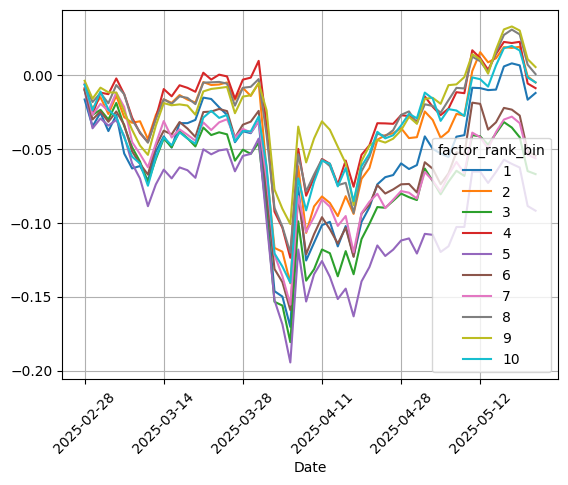

In [ ]:
(test.groupby(['factor_rank_bin', \
        'Date']).ret1.mean()-1).unstack().T.cumsum().plot(rot=45,grid=True)

<Axes: xlabel='Date'>

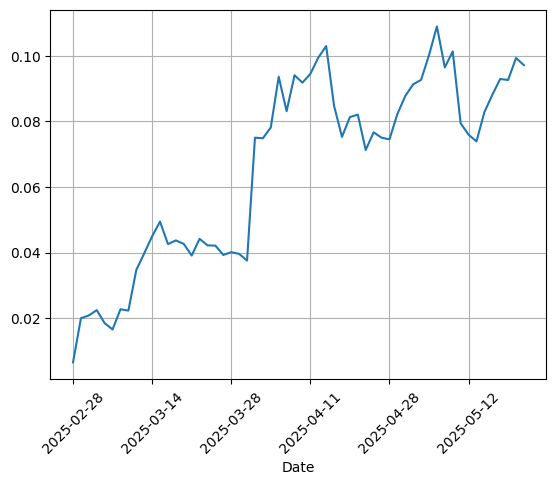

In [ ]:

long_ret = (test[(test.factor_rank_bin == 9)].groupby('Date').ret1.mean()-1).cumsum()
short_ret = (test[(test.factor_rank_bin == 5)].groupby('Date').ret1.mean()-1).cumsum()
(long_ret - short_ret).plot(rot=45,grid=True)

<Axes: xlabel='Date'>

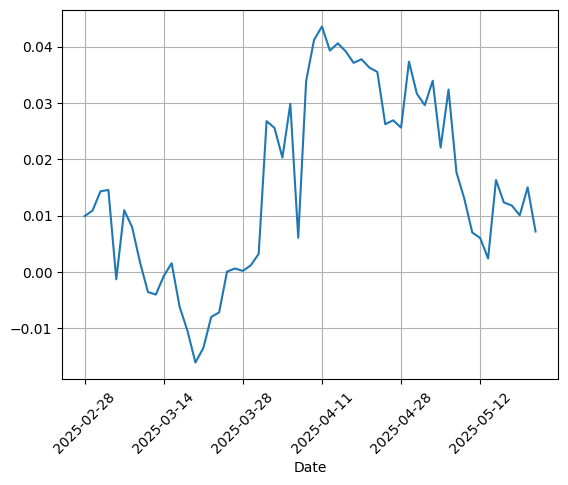

In [ ]:

long_ret = (test[(test.factor_rank_bin == 10)].groupby('Date').ret1.mean()-1).cumsum()
short_ret = (test[(test.factor_rank_bin == 1)].groupby('Date').ret1.mean()-1).cumsum()
(long_ret - short_ret).plot(rot=45,grid=True)

In [ ]:
ret_PD = (test.groupby(['factor_rank_bin', 'Date']).ret1.mean()-1.00).unstack().T

if ret_PD[1].mean()>ret_PD[10].mean():
    ret_PD['diff'] = ret_PD[1] - ret_PD[10]
else:
    ret_PD['diff'] = ret_PD[10] - ret_PD[1]


In [ ]:

def max_dd(returns):
    """Assumes returns is a pandas Series"""
    r = returns.cumsum()+1
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = returns.index[dd.argmin()]
    start = returns.index[r.loc[:end].argmax()]
    return mdd, start, end




def calc_pfmc(ret_PD):
    performance = []
    for i in [1,2,3,4,5,6,7,8,9,10,'diff']:
        returnlist = ret_PD[i]
        ret_year = (returnlist.mean()-0)*252
        ret_sharpe = (returnlist.mean()-0)/returnlist.std()*(252**0.5)
        max_draw, start, end = max_dd(returnlist)
        winratio = (returnlist>0).sum()/len(returnlist)
        std = returnlist.std()
        performance.append([i,ret_year,ret_sharpe,std,winratio,max_draw])
    performance = pd.DataFrame(performance,columns = ['group_name','return','sharpe',\
                    'std','winratio','mdd'])
    return performance

calc_pfmc(ret_PD)

,group_name,return,sharpe,std,winratio,mdd
0,1,-0.053404,-0.156138,0.021546,0.517241,-0.157452
1,2,-0.022840,-0.074983,0.019188,0.517241,-0.136744
2,3,-0.291790,-0.948614,0.019377,0.413793,-0.172190
3,4,-0.039264,-0.134577,0.018379,0.431034,-0.131919
4,5,-0.399361,-1.283854,0.019595,0.482759,-0.185915
5,6,-0.237725,-0.775334,0.019315,0.465517,-0.150448
6,7,-0.245426,-0.881905,0.017531,0.448276,-0.150500
7,8,0.001973,0.007611,0.016327,0.482759,-0.117677
8,9,0.022709,0.088572,0.016151,0.500000,-0.097249
9,10,-0.022271,-0.080000,0.017537,0.431034,-0.134732


<ipython-input-69-299a8f4b0a98>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby('Date').apply(lambda x: x.sort_values('pred', ascending = False).head(num)).reset_index(drop=True)


<Axes: title={'center': '2024-2025 year'}, xlabel='Date'>

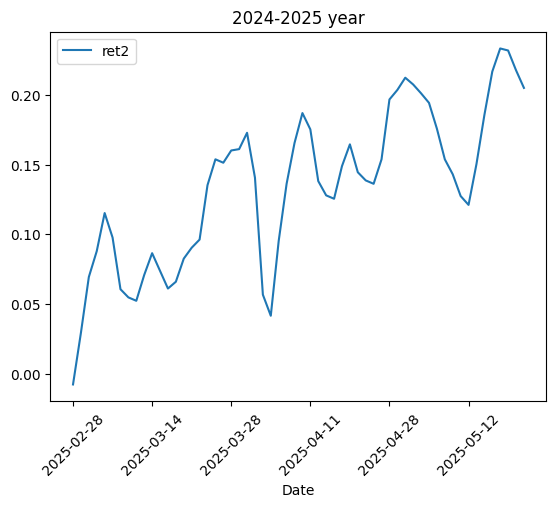

In [ ]:
tmp = test.copy()
tmp = tmp[(tmp.open_up<1.05)&(tmp.open_up>0.95)]
num = 10
tmp = tmp.groupby('Date').apply(lambda x: x.sort_values('pred', ascending = False).head(num)).reset_index(drop=True)
ret_pd1 = pd.DataFrame(tmp.groupby('Date').ret2.mean() - 1.0005)
(ret_pd1.loc['2024-05-08':,] ).cumsum().plot(rot=45, title = '2024-2025 year')

In [ ]:
def max_dd(returns):
    """Assumes returns is a pandas Series"""
    r = returns.cumsum()+1
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min().values[0]
    end = returns.index[dd.values.argmin()]
    start = returns.index[r.loc[:end].values.argmax()]
    return mdd, start, end


def calc_pfmc(ret_PD):
    ret_PD_ = ret_PD.copy()
    performance = []
    ret_PD_.columns = ['ret']
    returnlist = ret_PD_['ret']
    ret_year = (returnlist.mean())*252
    ret_sharpe = (returnlist.mean())/returnlist.std()*((252)**0.5)

    winratio = (returnlist>0).sum()/(returnlist!=0).sum()
    std = returnlist.std()

    ret2_len = pd.DataFrame(tmp.groupby('Date').ret.count())
    ret2_len = ret2_len.reindex(date_calc).fillna(0)
    stock_pct = ret2_len.mean().values[0]
    max_draw, start, end = max_dd(ret_PD)
    performance.append(['LSTM',ret_year,ret_sharpe,std,winratio,max_draw])
    performance = pd.DataFrame(performance,columns = ['group_name','return','sharpe',\
                    'std','winratio','mdd'])



    return performance

In [ ]:
calc_pfmc(ret_pd1)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,group_name,return,sharpe,std,winratio,mdd
0,LSTM,0.891113,2.335938,0.024033,0.5,-0.112305


In [ ]:
tmp[tmp.Date=='2025-03-27'][['Ticker','Date','pred','ret','ret1','ret2']].head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Ticker,Date,pred,ret,ret1,ret2
190,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
191,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
192,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
193,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
194,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
195,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
196,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
197,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
198,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535
199,AZO,2025-03-27,0.536112,0.998535,0.984863,0.998535


In [ ]:
tmp[tmp.Date=='2025-03-27']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Ticker,Date,open,high,low,close,volume,ret1,ret2,ret,open_up,ret_rank,pred,factor_rank,factor_rank_bin
190,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
191,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
192,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
193,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
194,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
195,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
196,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
197,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
198,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10
199,AZO,2025-03-27,5.828125,5.988281,5.867188,6.042969,-0.472168,0.984863,0.998535,0.998535,0.961426,0.536621,0.536112,1.0,10


In [ ]:
tmp

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Ticker,Date,open,high,low,close,volume,ret1,ret2,ret,open_up,ret_rank,pred,factor_rank,factor_rank_bin
0,AZO,2025-02-28,5.457031,5.425781,5.453125,5.480469,-0.484131,0.995605,0.993164,0.993164,0.973633,0.733398,0.535730,1.0,10
1,AZO,2025-02-28,5.457031,5.425781,5.453125,5.480469,-0.484131,0.995605,0.993164,0.993164,0.973633,0.733398,0.535730,1.0,10
2,AZO,2025-02-28,5.457031,5.425781,5.453125,5.480469,-0.484131,0.995605,0.993164,0.993164,0.973633,0.733398,0.535730,1.0,10
3,AZO,2025-02-28,5.457031,5.425781,5.453125,5.480469,-0.484131,0.995605,0.993164,0.993164,0.973633,0.733398,0.535730,1.0,10
4,AZO,2025-02-28,5.457031,5.425781,5.453125,5.480469,-0.484131,0.995605,0.993164,0.993164,0.973633,0.733398,0.535730,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,AZO,2025-05-21,6.183594,6.105469,6.132812,6.121094,-0.488037,0.996582,0.988281,0.988281,1.000977,0.186646,0.535654,1.0,10
576,AZO,2025-05-21,6.183594,6.105469,6.132812,6.121094,-0.488037,0.996582,0.988281,0.988281,1.000977,0.186646,0.535654,1.0,10
577,AZO,2025-05-21,6.183594,6.105469,6.132812,6.121094,-0.488037,0.996582,0.988281,0.988281,1.000977,0.186646,0.535654,1.0,10
578,AZO,2025-05-21,6.183594,6.105469,6.132812,6.121094,-0.488037,0.996582,0.988281,0.988281,1.000977,0.186646,0.535654,1.0,10


In [ ]:
import yfinance as yf

dfindex = yf.download(tickers='^SPX', start='2025-02-28',end='2025-05-27')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
dfindex['ret'] = dfindex[('Close', '^SPX')].pct_change()
dfindex

Price,Close,High,Low,Open,Volume,ret
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,
Date,,,,,,
2025-02-28,5954.500000,5959.399902,5837.660156,5856.740234,6441140000,NaN
2025-03-03,5849.720215,5986.089844,5810.910156,5968.330078,5613850000,-0.017597
2025-03-04,5778.149902,5865.080078,5732.589844,5811.979980,6138110000,-0.012235
2025-03-05,5842.629883,5860.589844,5742.350098,5781.359863,5285970000,0.011159
2025-03-06,5738.520020,5812.080078,5711.640137,5785.870117,5165080000,-0.017819
2025-03-07,5770.200195,5783.009766,5666.290039,5726.009766,5705140000,0.005521
2025-03-10,5614.560059,5705.370117,5564.020020,5705.370117,6409370000,-0.026973
2025-03-11,5572.069824,5636.299805,5528.410156,5603.649902,6221240000,-0.007568


In [ ]:
# Calculate pct_change for ('Close', '^SPX')
pct_chg = dfindex[('Close', '^SPX')].pct_change()

# Create DataFrame with Date as a column and pct_chg as another
result = pct_chg.rename('pct_chg').reset_index()
result.columns = ['Date', 'pct_chg']  # Ensure column names are as desired

dfindex = result.set_index('Date')
# dfindex


In [ ]:
# print(ret_pd1.index)
# print(dfindex.index)
# print(ret_pd1.index.dtype)
# print(dfindex.index.dtype)
# For ret_pd1 (object/string index)
ret_pd1.index = pd.to_datetime(ret_pd1.index)

# For dfindex (optional, if already DatetimeIndex, but safe)
dfindex.index = pd.to_datetime(dfindex.index)


In [ ]:
# ret_pd_concat = pd.concat([ret_pd1, dfindex], axis=1)
ret_pd_concat = pd.merge(ret_pd1,dfindex,left_index=True, right_index=True)
ret_pd_concat

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,ret2,pct_chg
Date,,
2025-02-28,-0.007812,NaN
2025-03-03,0.037109,-0.017597
2025-03-04,0.040039,-0.012235
2025-03-05,0.018555,0.011159
2025-03-06,0.027344,-0.017819
2025-03-07,-0.017578,0.005521
2025-03-10,-0.037109,-0.026973
2025-03-11,-0.005859,-0.007568
2025-03-12,-0.002441,0.004887


In [ ]:
# ret_pd_concat = pd.merge(ret_pd1,dfindex*100,left_index=True, right_index=True)
ret_pd_concat = pd.concat([ret_pd1, dfindex], axis=1)
ret_pd_concat.columns = ['ret','dfindex']
ret_pd_concat['diff'] = ret_pd_concat['ret'] - ret_pd_concat['dfindex']
ret_pd_concat

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,ret,dfindex,diff
Date,,,
2025-02-28,-0.007812,NaN,NaN
2025-03-03,0.037109,-0.017597,0.054706
2025-03-04,0.040039,-0.012235,0.052274
2025-03-05,0.018555,0.011159,0.007395
2025-03-06,0.027344,-0.017819,0.045163
2025-03-07,-0.017578,0.005521,-0.023099
2025-03-10,-0.037109,-0.026973,-0.010136
2025-03-11,-0.005859,-0.007568,0.001708
2025-03-12,-0.002441,0.004887,-0.007328


In [ ]:
ret_pd_concat.corr()

,ret,dfindex,diff
ret,1.000000,0.168779,0.706047
dfindex,0.168779,1.000000,-0.578840
diff,0.706047,-0.578840,1.000000


<Axes: title={'center': '2022-2024 year'}, xlabel='Date'>

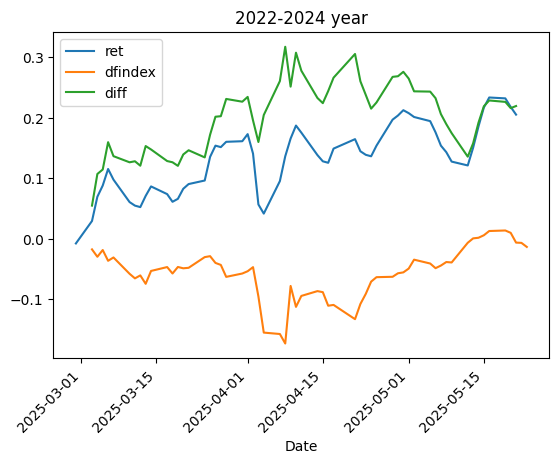

In [ ]:
(ret_pd_concat[['ret','dfindex','diff']].cumsum()).plot(rot=45, title = '2022-2024 year')


In [ ]:
calc_pfmc(ret_pd_concat[['diff']])

,group_name,return,sharpe,std,winratio,mdd
0,LSTM,0.969512,2.087873,0.029252,0.483333,-0.137884
